In [ ]:
!uv pip install pandas

In [ ]:
!uv pip install matplotlib
!uv pip install seaborn 
!uv pip install scikit-learn
!uv pip install boto3

In [5]:
import pandas

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from IPython.display import display , Image
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import os
import pandas as pd
import numpy as np
import logging

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [12]:
len(iris.data)

150

In [13]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["class"] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Move 'class' to first column
cols = ['class'] + [col for col in df.columns if col != 'class']
df = df[cols]
df.head()


,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [6]:
train_df, test_df = train_test_split(
    df, test_size=0.33, random_state=42, stratify=df["class"]
)

In [7]:
train_df["class"].unique()

array([2, 0, 1])

In [8]:
train_df["class"].value_counts()


class
0    34
2    33
1    33
Name: count, dtype: int64

In [9]:
test_df["class"].value_counts()


class
2    17
1    17
0    16
Name: count, dtype: int64

In [10]:
!mkdir -p data

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file data already exists.
Error occurred while processing: data.


In [11]:
train_df.to_csv("data/iris_train.csv", index=False, header=None)
test_df.to_csv("data/iris_test.csv", index=False, header=None)

In [ ]:
infer_df = test_df.drop(columns=["class"])
infer_df.head()2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
7,5.0,3.4,1.5,0.2
67,5.8,2.7,4.1,1.0
107,7.3,2.9,6.3,1.8


In [13]:
infer_df.to_csv("data/iris_infer.csv", index=False, header=None)


In [14]:
!aws s3 cp data/iris_train.csv s3://sgmkr-learner/iris/data/
!aws s3 cp data/iris_test.csv s3://sgmkr-learner/iris/data/
!aws s3 cp data/iris_infer.csv s3://sgmkr-learner/iris/data/


Completed 1.9 KiB/1.9 KiB (880 Bytes/s) with 1 file(s) remaining
upload: data\iris_train.csv to s3://sgmkr-learner/iris/data/iris_train.csv
Completed 950 Bytes/950 Bytes (412 Bytes/s) with 1 file(s) remaining
upload: data\iris_test.csv to s3://sgmkr-learner/iris/data/iris_test.csv
Completed 850 Bytes/850 Bytes (633 Bytes/s) with 1 file(s) remaining
upload: data\iris_infer.csv to s3://sgmkr-learner/iris/data/iris_infer.csv


In [29]:
import boto3
s3 = boto3.client('s3')

In [30]:
bucket_name = 'sgmkr-learner'

In [31]:
try:
    s3.create_bucket(Bucket=bucket_name)
    print(f"Bucket '{bucket_name}' created successfully.")
except Exception as e:
    print(f"Error creating bucket: {e}")

Bucket 'sgmkr-learner' created successfully.


In [ ]:
!aws s3 cp data/iris_train.csv s3://sgmkr-learner/iris/data/
!aws s3 cp data/iris_test.csv s3://sgmkr-learner/iris/data/
!aws s3 cp data/iris_infer.csv s3://sgmkr-learner/iris/data/

Completed 1.9 KiB/1.9 KiB (914 Bytes/s) with 1 file(s) remaining
upload: data\iris_train.csv to s3://sgmkr-learner/iris/data/iris_train.csv
Completed 950 Bytes/950 Bytes (685 Bytes/s) with 1 file(s) remaining
upload: data\iris_test.csv to s3://sgmkr-learner/iris/data/iris_test.csv
Completed 850 Bytes/850 Bytes (253 Bytes/s) with 1 file(s) remaining
upload: data\iris_infer.csv to s3://sgmkr-learner/iris/data/iris_infer.csv


In [35]:
!aws s3 cp data/iris_infer.csv s3://sgmkr-learner/iris/batch_transform/

Completed 850 Bytes/850 Bytes (629 Bytes/s) with 1 file(s) remaining
upload: data\iris_infer.csv to s3://sgmkr-learner/iris/batch_transform/iris_infer.csv


In [36]:
s3.delete_objects(Bucket=bucket_name, Delete={'Objects': [{'Key': 'iris/data/iris_infer.csv'}]})

{'ResponseMetadata': {'RequestId': 'K0GD47NG094TAXVQ',
  'HostId': 'tRSnNEeQy0LaCmuoC80loAr3avkCJs/m7QNpdgIGPoSooXfHsn/40P4X081zyeKEyf07qs0aqZp3v3gwYvwSaaK4FhXov1ZDP35ftynNUhs=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'tRSnNEeQy0LaCmuoC80loAr3avkCJs/m7QNpdgIGPoSooXfHsn/40P4X081zyeKEyf07qs0aqZp3v3gwYvwSaaK4FhXov1ZDP35ftynNUhs=',
   'x-amz-request-id': 'K0GD47NG094TAXVQ',
   'date': 'Sat, 07 Jun 2025 09:53:03 GMT',
   'connection': 'close',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Deleted': [{'Key': 'iris/data/iris_infer.csv'}]}

In [37]:
resp=s3.list_objects_v2(Bucket=bucket_name)

In [38]:
resp

{'ResponseMetadata': {'RequestId': 'G5MA0T0DBZKWYJG7',
  'HostId': 'l/kroCyviFoJkZ3xq9IQ3rfGMNxL4huGnRduHEkF62p+XPPPrq8ip6N/8OUIxFYoxQfVIcO/9vyZX1QGUWxPbGIAGARtspepxTRwzee50co=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'l/kroCyviFoJkZ3xq9IQ3rfGMNxL4huGnRduHEkF62p+XPPPrq8ip6N/8OUIxFYoxQfVIcO/9vyZX1QGUWxPbGIAGARtspepxTRwzee50co=',
   'x-amz-request-id': 'G5MA0T0DBZKWYJG7',
   'date': 'Sat, 07 Jun 2025 09:55:19 GMT',
   'x-amz-bucket-region': 'us-east-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Contents': [{'Key': 'iris/batch_transform/iris_infer.csv',
   'LastModified': datetime.datetime(2025, 6, 7, 9, 49, 22, tzinfo=tzutc()),
   'ETag': '"10b2df6ea2d26d9a74cc6893383af7fa"',
   'ChecksumAlgorithm': ['CRC64NVME'],
   'ChecksumType': 'FULL_OBJECT',
   'Size': 850,
   'StorageClass': 'STANDARD'},
  {'Key': 'iris/data/iris_test.csv',
   'LastModified': datetime.datetime

In [39]:
resp['Contents']

[{'Key': 'iris/batch_transform/iris_infer.csv',
  'LastModified': datetime.datetime(2025, 6, 7, 9, 49, 22, tzinfo=tzutc()),
  'ETag': '"10b2df6ea2d26d9a74cc6893383af7fa"',
  'ChecksumAlgorithm': ['CRC64NVME'],
  'ChecksumType': 'FULL_OBJECT',
  'Size': 850,
  'StorageClass': 'STANDARD'},
 {'Key': 'iris/data/iris_test.csv',
  'LastModified': datetime.datetime(2025, 6, 7, 9, 41, 26, tzinfo=tzutc()),
  'ETag': '"fd634e03fbb760009efa98f341b02ce0"',
  'ChecksumAlgorithm': ['CRC64NVME'],
  'ChecksumType': 'FULL_OBJECT',
  'Size': 950,
  'StorageClass': 'STANDARD'},
 {'Key': 'iris/data/iris_train.csv',
  'LastModified': datetime.datetime(2025, 6, 7, 9, 41, 23, tzinfo=tzutc()),
  'ETag': '"cab47f97f4b14f3f46a67d38dfe29969"',
  'ChecksumAlgorithm': ['CRC64NVME'],
  'ChecksumType': 'FULL_OBJECT',
  'Size': 1900,
  'StorageClass': 'STANDARD'}]

In [40]:
for obj in resp.get('Contents', []):
    print(obj['Key'])

iris/batch_transform/iris_infer.csv
iris/data/iris_test.csv
iris/data/iris_train.csv


In [33]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

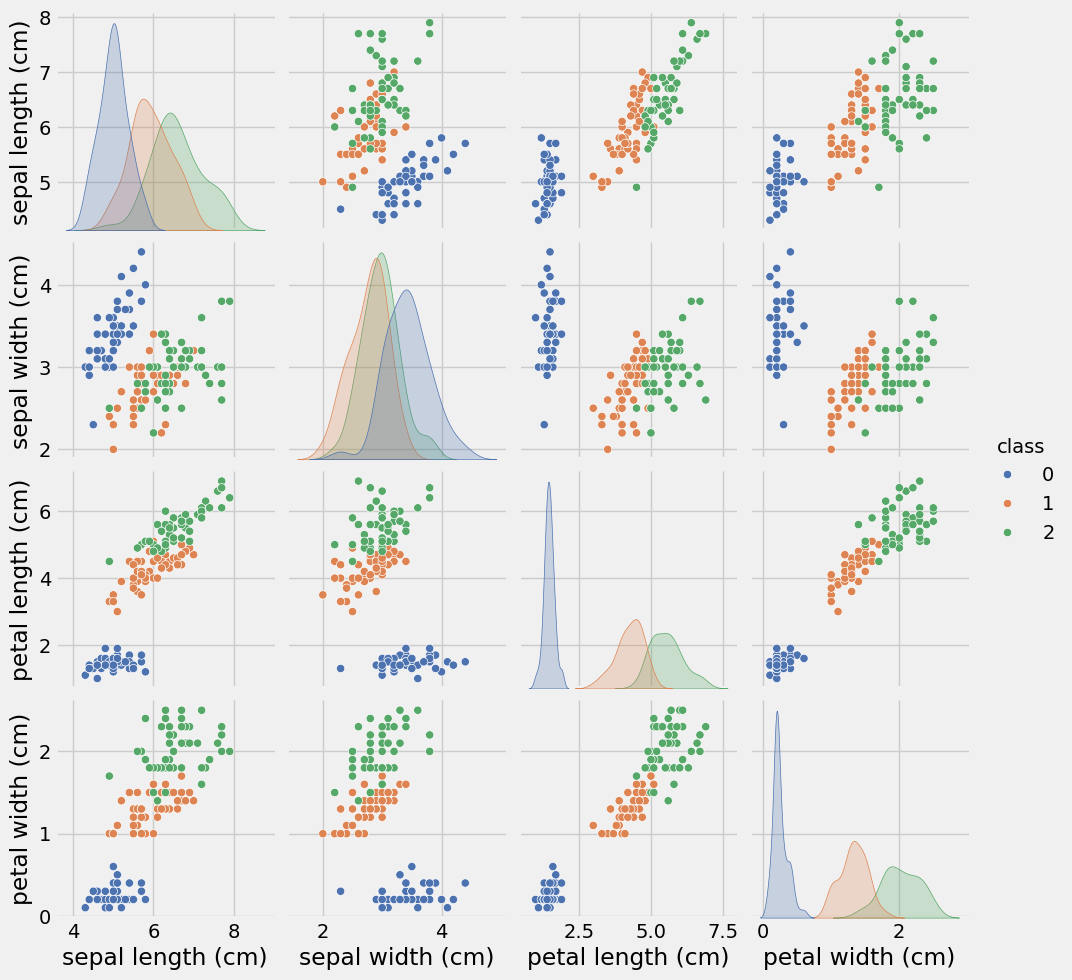

In [34]:
sb.pairplot(df, hue="class", palette="deep")
plt.show()

---

# 📝 **Iris Dataset — Pairplot Analysis (Full Detailed Notes)**

---

## 📦 Dataset Summary

* **Name:** Iris Flower Dataset
* **Samples:** 150 flowers
* **Classes (Targets):**

  * 0 → *Iris-setosa* (blue)
  * 1 → *Iris-versicolor* (orange)
  * 2 → *Iris-virginica* (green)
* **Features (Inputs):**

  1. Sepal Length (cm)
  2. Sepal Width (cm)
  3. Petal Length (cm)
  4. Petal Width (cm)

---

## 🎯 **Purpose of Pairplot**

* Visualize relationships between features.
* Understand feature distributions.
* Observe class separability.
* Help select good features for ML models.

---

## 🔎 **Full Feature-wise Analysis**

---

### 1️⃣ **Sepal Length**

* **Range:** \~4 to 8 cm.
* **Class Behavior:**

  * Class 0 (Setosa): \~4.5 to 5.5 cm.
  * Class 1 (Versicolor): \~5.5 to 7 cm.
  * Class 2 (Virginica): \~6 to 7.5 cm.
* **Insights:**

  * Sepal Length helps separate Setosa from others.
  * Significant overlap between Versicolor and Virginica → weak feature to separate these two.

---

### 2️⃣ **Sepal Width**

* **Range:** \~2 to 4.5 cm.
* **Class Behavior:**

  * Class 0 (Setosa): \~3.0 to 4.5 cm.
  * Class 1 & 2: mostly \~2.0 to 3.5 cm.
* **Insights:**

  * Very strong for detecting Setosa.
  * Poor at separating Versicolor and Virginica.
  * Alone, Sepal Width cannot classify all 3 classes.

---

### 3️⃣ **Petal Length**

* **Range:** \~1 to 7 cm.
* **Class Behavior:**

  * Class 0 (Setosa): tightly clustered at \~1.0 cm.
  * Class 1 (Versicolor): \~3 to 5 cm.
  * Class 2 (Virginica): \~4.5 to 7 cm.
* **Insights:**

  * One of the **most powerful features**.
  * Very good class separation.
  * Minimal overlap between Versicolor and Virginica — sharp class boundary.

---

### 4️⃣ **Petal Width**

* **Range:** \~0 to 2.5 cm.
* **Class Behavior:**

  * Class 0 (Setosa): \~0.1 cm.
  * Class 1 (Versicolor): \~1 to 1.5 cm.
  * Class 2 (Virginica): \~1.5 to 2.3 cm.
* **Insights:**

  * Another **extremely powerful feature**.
  * Near-perfect separation across all classes.
  * Slight overlap between Versicolor and Virginica.

---

## 🔬 **Key Visual Observations from Pairplot**

| Feature Pair                 | Separation Ability                           |
| ---------------------------- | -------------------------------------------- |
| Sepal Length vs Sepal Width  | Only separates Setosa; weak for others       |
| Petal Length vs Petal Width  | Very strong separation; near-perfect         |
| Sepal Length vs Petal Length | Clearly separates Setosa; partial for others |
| Sepal Width vs Petal Length  | Similar pattern                              |

---

## 🔬 **Deep Dive into Sepal Length vs Sepal Width (your zoomed-in plot)**

* Setosa forms a **tight isolated cluster** (blue).
* Versicolor & Virginica overlap heavily.
* Sepal features alone cannot separate all 3 classes fully.
* If only Sepal features are used:

  * High recall for Setosa.
  * Poor precision between Versicolor and Virginica.

---

## ⚙️ **Machine Learning Implications**

* **Strong features:** Petal Length, Petal Width.
* **Weak features:** Sepal Width, Sepal Length (for class 1 vs 2 separation).
* **Ideal feature combinations for ML models:**

  * Petal Width + Petal Length ⇒ very high model accuracy.
* **Classification boundary:**

  * Linear models (like Logistic Regression) will do well.
  * Non-linear models (like Decision Trees, SVM, kNN) can achieve near-perfect accuracy.

---

## 🔧 **Practical Use-Case Summary**

| Task                        | Feature Selection          |
| --------------------------- | -------------------------- |
| Quick separation of Setosa  | Sepal Width + Sepal Length |
| Full 3-class classification | Petal Width + Petal Length |
| Best accuracy               | Use all 4 features         |

---

## 🧠 **The most important insight to remember**

> 🟢 Petal measurements contain the strongest signal for species classification.
> 🟠 Sepal measurements contain useful signal only for Setosa vs non-Setosa.

---
